# Taller Área de un Círculo

Se importaron librerías para manipular ciertas operaciones matemáticas y para el manejo de gráficas en python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Se definieron las funciones correspondientes generadoras de numeros aleatorios usando el método visto en clase con valores constantes estandar.

Funcion Generadora que usa valores constantes de Borland C/C++, recibe como parámetros n y r, que corresponden a la cantidad de números aleatorios y a un valor que se usa como referencia para crear la semilla, respectivamente.

In [2]:
def aleaX(n,r):
    semilla = r
    #Valores Borland C/C++
    a=22695477
    b=1
    m=2**32
    uVector = []
    #uVector.append( semilla / float(m) )
    for i in range(0,n):
    	rta = ( (a*semilla) + b ) % m
    	semilla = rta
    	u = rta / float(m)
    	uVector.append(u)
    return uVector

Ahora aplicamos de igual forma la función generadora pero con valores estandar Posix.

In [3]:
def aleaY(n,r):
    semilla = 2*r
    #Valores POSIX
    a=25214903917
    b=11
    m=2**48
    uVector = []
    #uVector.append( semilla / float(m) )
    for i in range(0,n):
    	rta = ( (a*semilla) + b ) % m
    	semilla = rta
    	u = rta / float(m)
    	uVector.append(u)
    return uVector

Se crea una función que recibe un vector que contiene valores de 0 a 1 (aleatorios) y los redimensiona a una escala de -r a r (valores del círculo).

Para hacer la redimensión usamos: 

$X_{ir} = (X_{i} * 2r) - r$


In [4]:
def convR(vector,r):
    for i in range(0,len(vector)):
        vector[i] = (vector[i]*2*r) - r
    return vector

Ahora lo más sabrosongo, la función que se encarga de tomar los valores, manipularlos, graficarlos y calcular el área. Recibe como parámetro el valor r.

Cabe resaltar que para los valores identificados como internos o externos se uso la fórmula $r^{2} >= x^{2}_{i} + y^{2}_{i}$ siendo aquellos valores que cumplen como los que consideramos internos.

In [5]:
def areaCir(r):
    binVector = []
    n=100
    suma=0
    aleX = aleaX(n,r)
    aleY = aleaY(n,r)
    aleXR = convR(aleX,r)
    aleYR = convR(aleY,r)
    for i in range(0,n):
        if (r**2 >= (aleXR[i]**2 + aleYR[i]**2)):
            binVector.append(1)
        else:
            binVector.append(0)
    for i in binVector:
        suma += i
    delta = 1 / float(n*((2*r)**2))
    #print("Suma = ",suma)
    #print ("Delta = ", delta)
    
    x = np.linspace(-r, r, 1000)
    #Formula del círculo r^2 = x^2 + y^2
    y1 = np.sqrt(r**2 - x**2)
    y2 = -np.sqrt(r**2 - x**2)

    
    #plt.figure()
    for i in range(0, n):
        if(binVector[i]==1):
            plt.plot(aleXR[i],aleYR[i],marker='o',color="blue")
        else:
            plt.plot(aleXR[i],aleYR[i],marker='o',color="red")
    
    plt.plot(x,y1,color="black")
    #plt.hold()
    plt.plot(x,y2,color="black")
    #plt.hold()
    # Establecer el color de los ejes.
    plt.axhline(0, color="black")
    plt.axvline(0, color="black")
    # Limitar los valores de los ejes.
    plt.xlim(-r-(r/4), r+(r/4))
    plt.ylim(-r-(r/4), r+(r/4))
    #Características
    areaReal = np.pi*(r**2)
    areaEsti = suma*delta
    title = "Area Real = "+str(areaReal)+", Area Estimada = "+str(areaEsti)+", Error = "+str(np.abs(areaReal-areaEsti))
    plt.title(title)
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    #plt.legend(loc="upper left") 
    # Mostrarlo.
    plt.show()

Se define el valor de r que se envía y ejecuta el método encargado de calcular el área del círculo.

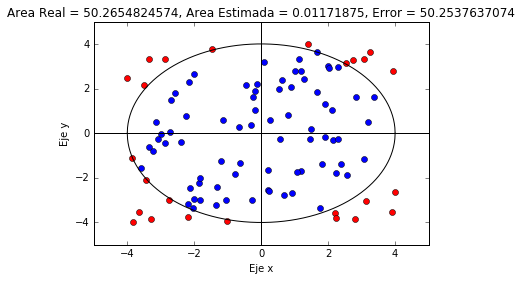

In [6]:
r=4
areaCir(r)